In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# ** Información del origen del data set **

# Database: Antarctic Biodiversity Information Facility

# Descriptive Analysis

## Data set Description: Antarctic Plant Database

Is a database of the plant collections held in the British Antarctic Survey's herbarium (international code AAS). This contains over 40 000 plant specimens from Antarctica, the sub-Antarctic Islands and surrounding continents (especially Fuegia and Patagonia). Over 2000 species are represented, comprising predominantly mosses, liverworts and lichens with smaller collections of vascular plants, macro-algae and macro-fungi.

## Citation

[British Antarctic Survey. ANTARCTIC PLANT DATABASE. Occurrence Dataset](https://doi.org/10.15468/6dgnjf)

In [3]:
# Import data 

bd_plantas = pd.read_csv('9d1cf2e1-f5c3-4538-b554-2014961e6aac.csv')
bd_plantas.head(5)

,id,license,rightsHolder,accessRights,bibliographicCitation,references,institutionCode,collectionCode,datasetName,dynamicProperties,...,family,genus,subgenus,specificEpithet,infraspecificEpithet,taxonRank,scientificNameAuthorship,basisOfRecord,datasetKey,dataset_id
0,543214,CC_BY_4_0,NaN,NaN,NaN,NaN,AAS,Antarctic Plant Database,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,KINGDOM,NaN,PRESERVED_SPECIMEN,82d9ff5c-f762-11e1-a439-00145eb45e9a,97
1,543215,CC_BY_4_0,NaN,NaN,NaN,NaN,AAS,Antarctic Plant Database,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,KINGDOM,NaN,PRESERVED_SPECIMEN,82d9ff5c-f762-11e1-a439-00145eb45e9a,97
2,644461,CC_BY_4_0,NaN,NaN,NaN,NaN,AAS,Antarctic Plant Database,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,KINGDOM,NaN,PRESERVED_SPECIMEN,82d9ff5c-f762-11e1-a439-00145eb45e9a,97
3,750139,CC_BY_4_0,NaN,NaN,NaN,NaN,AAS,Antarctic Plant Database,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,KINGDOM,NaN,PRESERVED_SPECIMEN,82d9ff5c-f762-11e1-a439-00145eb45e9a,97
4,767439,CC_BY_4_0,NaN,NaN,NaN,NaN,AAS,Antarctic Plant Database,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,KINGDOM,NaN,PRESERVED_SPECIMEN,82d9ff5c-f762-11e1-a439-00145eb45e9a,97


In [4]:
# Data set exploration

bd_plantas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50786 entries, 0 to 50785
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   50786 non-null  int64  
 1   license                              50786 non-null  object 
 2   rightsHolder                         0 non-null      float64
 3   accessRights                         0 non-null      float64
 4   bibliographicCitation                0 non-null      float64
 5   references                           0 non-null      float64
 6   institutionCode                      50786 non-null  object 
 7   collectionCode                       50786 non-null  object 
 8   datasetName                          0 non-null      float64
 9   dynamicProperties                    0 non-null      float64
 10  recordedBy                           50748 non-null  object 
 11  individualCount             

In [5]:
columns = bd_plantas.columns.values
columns

array(['id', 'license', 'rightsHolder', 'accessRights',
       'bibliographicCitation', 'references', 'institutionCode',
       'collectionCode', 'datasetName', 'dynamicProperties', 'recordedBy',
       'individualCount', 'organismQuantity', 'organismQuantityType',
       'sex', 'lifeStage', 'occurrenceStatus', 'reproductiveCondition',
       'behavior', 'occurrenceRemarks', 'eventDate', 'eventTime', 'year',
       'month', 'day', 'verbatimEventDate', 'samplingProtocol',
       'sampleSizeValue', 'sampleSizeUnit', 'samplingEffort',
       'fieldNotes', 'locality', 'verbatimLocality', 'depth',
       'verbatimDepth', 'minimumDistanceAboveSurfaceInMeters',
       'maximumDistanceAboveSurfaceInMeters', 'locationAccordingTo',
       'locationRemarks', 'decimalLatitude', 'decimalLongitude',
       'geodeticDatum', 'coordinateUncertaintyInMeters',
       'coordinatePrecision', 'scientificName', 'taxonKey', 'kingdom',
       'phylum', '_class', 'order', 'family', 'genus', 'subgenus',
       '

In [6]:
# Identification of columns that do not have unique values

columns_no_unique = []
for col in columns:
  if len(bd_plantas[col].unique()) > 1 and len(bd_plantas[col].unique()) != 50786 :
    columns_no_unique.append(col)

columns_no_unique

['recordedBy',
 'eventDate',
 'year',
 'month',
 'day',
 'locality',
 'decimalLatitude',
 'decimalLongitude',
 'scientificName',
 'taxonKey',
 'kingdom',
 'phylum',
 '_class',
 'order',
 'family',
 'genus',
 'specificEpithet',
 'infraspecificEpithet',
 'taxonRank']

In [7]:
for col in columns_no_unique : 
  print(col, ": ", bd_plantas[col].unique())

recordedBy :  ['Convey, P.' 'Greenfield, L.' 'Hankinson, W.' 'Crawford, A.B.'
 'Bell, B.G.' 'Upson, R.' 'Smith, R.I.L.' 'Engel, J. J.' 'Gremmen, N.J.M.'
 'Hassel de Menendez, G.G.' 'Greene, S.W.' 'Richardson, I.'
 'Dudley, T.R., Goodall, R.N.P. & Crow, G.' 'Moore, D.M.' 'Headland, R.K.'
 'Barrett, B. & Morris, K.' 'Moore, D.M. & Goodall, R.N.P.' 'Smith, J.'
 'Heilbronn, T.D.' 'Wendt, A.' 'Sladen, W.J.L.'
 'Longton, R.E. & Smith, R.I.L.' 'Shanklin, J.' 'Stevenson, N.'
 'Given, D.R.' 'MacAlister, H.' 'Newsham, K.' 'Wright, E.P.'
 'Imshaug, H.A. &Harris, R.C.' 'Borland, D.' 'Barrow, C.J.' 'Bonner, N.'
 'Morris, R.' 'Steere, W.C. & Greene,S.W.' 'Greene, D.M. & Greene, S.W.'
 'Hoppe, A.D.L.' 'Matteri, C.M.' 'Matteri, C.M. & Schiavone, M.'
 'Collins, N.J.' 'Longton, R.E.' 'Lindsay, D.C.' 'McManmon, M.'
 'Corner, R.W.M.' 'Walton, D.W.H.' 'Edwards, J.A.' 'Downie, R.' 'Unknown'
 'Adams, W.A.' 'Pisano, E.' 'Zotov, V.D.' 'Sorenson, J.H.' 'Huntley, B.J.'
 'Roivainen, H.' 'Lovegrove, I.W.' 'Vitt, D

Creation of new data frames to analyze them separately

# Data Frames created:

total_recordedBy

total_eventDate

total_year

total_month

total_day

total_locality

total_decimalLatitude

total_decimalLongitude

total_scientificName

total_taxonKey

total_kingdom

total_phylum

total__class

total_order

total_family

total_genus

total_specificEpithet

total_infraspecificEpithet

total_taxonRank

In [8]:
for col in columns_no_unique:
  locals()["total_" + col] = pd.DataFrame(bd_plantas[col].value_counts(),columns = [col])
  locals()["total_" + col] = locals()["total_" + col].rename_axis('Valor').reset_index()


In [9]:
#Identify unneded columns and remove them

columns_NoRequired = []
for col in columns:
  if len(bd_plantas[col].unique()) < 2 :
    columns_NoRequired.append(col)

for col in columns_NoRequired:  
  bd_plantas = bd_plantas.drop([col], axis= 1)

bd_plantas = bd_plantas.drop(['id'], axis= 1)

In [10]:
# new data frame

bd_plantas.head(5)

,recordedBy,eventDate,year,month,day,locality,decimalLatitude,decimalLongitude,scientificName,taxonKey,kingdom,phylum,_class,order,family,genus,specificEpithet,infraspecificEpithet,taxonRank
0,"Convey, P.",2008-01-01T01:00Z,2008.0,NaN,NaN,On moss. Gently sloping top of headland surrou...,-63.837,-60.939,incertae sedis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KINGDOM
1,"Convey, P.",2008-01-01T01:00Z,2008.0,NaN,NaN,On moss. Gently sloping top of headland surrou...,-63.837,-60.939,incertae sedis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KINGDOM
2,"Greenfield, L.",NaN,NaN,NaN,NaN,Astrolabe Island. Antarctic Peninsula,-63.320,-58.680,incertae sedis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KINGDOM
3,"Hankinson, W.",1984-03-01T01:00Z,1984.0,3.0,NaN,Brabant Island. Antarctic Peninsula,-64.280,-62.330,incertae sedis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KINGDOM
4,"Crawford, A.B.",1974-01-01T01:00Z,1974.0,NaN,NaN,South Georgia,-54.020,-37.270,incertae sedis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KINGDOM


In [11]:
bd_plantas = bd_plantas.fillna(0)
bd_plantas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50786 entries, 0 to 50785
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   recordedBy            50786 non-null  object 
 1   eventDate             50786 non-null  object 
 2   year                  50786 non-null  float64
 3   month                 50786 non-null  float64
 4   day                   50786 non-null  float64
 5   locality              50786 non-null  object 
 6   decimalLatitude       50786 non-null  float64
 7   decimalLongitude      50786 non-null  float64
 8   scientificName        50786 non-null  object 
 9   taxonKey              50786 non-null  int64  
 10  kingdom               50786 non-null  object 
 11  phylum                50786 non-null  object 
 12  _class                50786 non-null  object 
 13  order                 50786 non-null  object 
 14  family                50786 non-null  object 
 15  genus              

# Exploration of data frames

In [16]:
# Year

bd_plantas['year'] = bd_plantas['year'].astype('int')
bd_plantas['year'].unique()


array([2008,    0, 1984, 1974, 1971, 2003, 2006, 1976, 2007, 1964, 1979,
       1980, 1968, 1957, 2000, 1978, 1950, 1965, 1993, 1977, 1961, 1970,
       1960, 1992, 1959, 1989, 1991, 1972, 1969, 1966, 1963, 1967, 1999,
       1975, 1895, 1929, 1983, 1947, 2002, 1998, 1982, 1995, 1997, 1996,
       1985, 1981, 1962, 1973, 1994, 2001, 1958, 1988, 1986, 1896, 1987,
       1949, 1951, 1945, 1990, 1946, 2005, 1954, 1944, 1902, 1943, 1948,
       1928, 1952, 1940, 1934, 1956, 1890, 1953, 1941, 1918, 1955, 1932,
       1897, 1923, 1937, 1935, 1933, 1927, 2004, 2009])

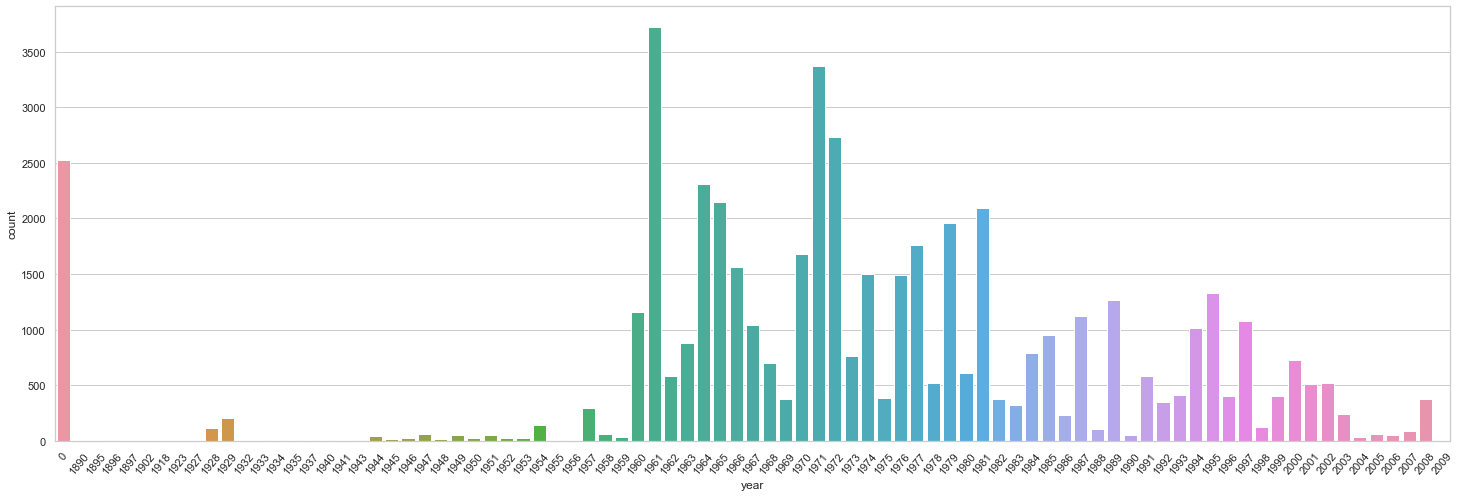

In [18]:
plt.figure(figsize = (25,8))
ax = sns.countplot(x="year", data=bd_plantas)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
sns.set_theme(style="whitegrid")
plt.savefig('hist_year.png')

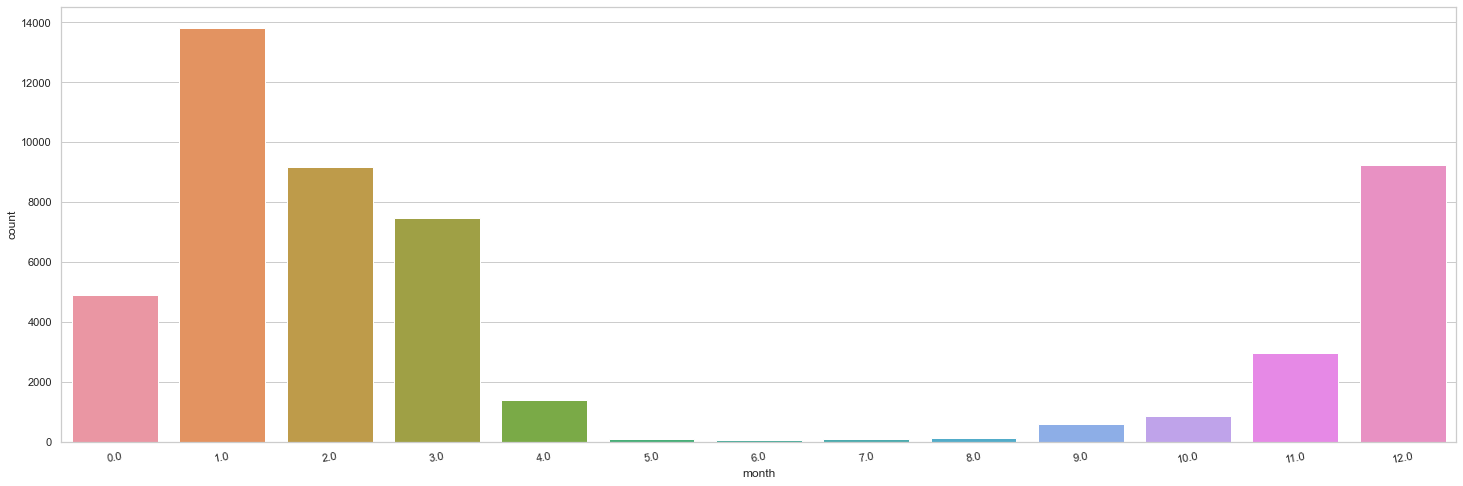

In [20]:
# Month

plt.figure(figsize = (25,8))
ax = sns.countplot(x="month", data=bd_plantas)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
sns.set_theme(style="whitegrid")
plt.savefig('hist_month.png')

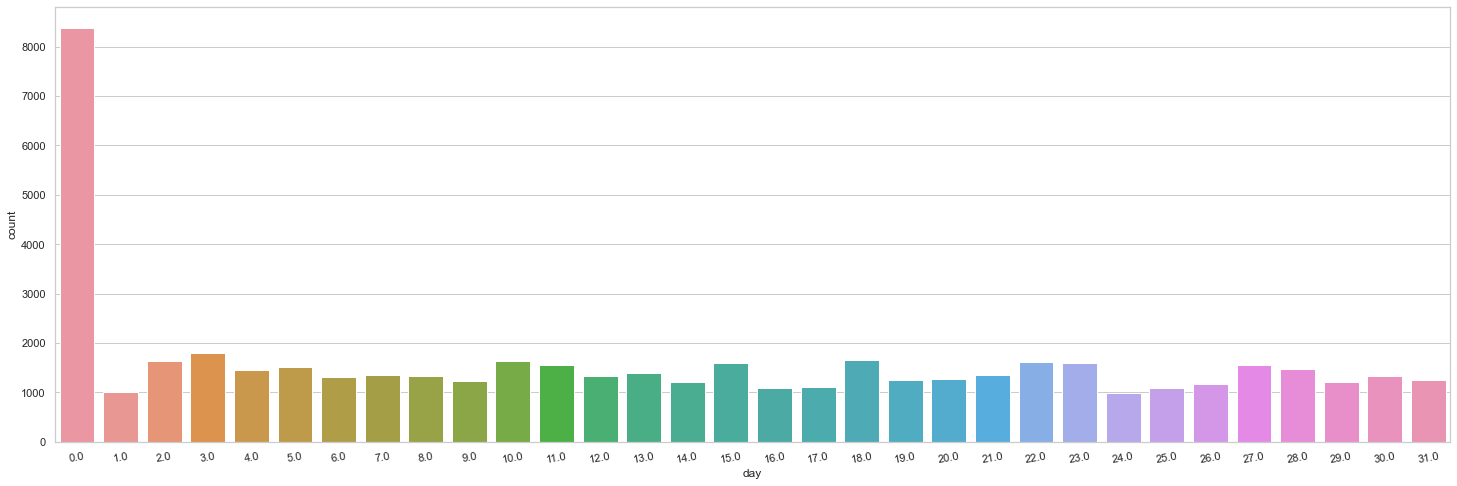

In [21]:
# day

plt.figure(figsize = (25,8))
ax = sns.countplot(x="day", data=bd_plantas)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
sns.set_theme(style="whitegrid")
plt.savefig('hist_day.png')

In [22]:
# Kingdom
total_kingdom

,Valor,kingdom
0,Plantae,30241
1,Fungi,15484
2,Bacteria,94
3,Animalia,7
4,Protozoa,7
5,Chromista,1


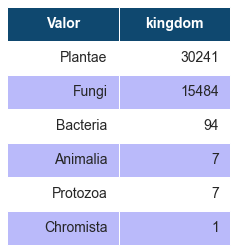

In [28]:
# colors https://www.color-hex.com/color/40466e
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#0f486f', row_colors=['#babafa', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(total_kingdom, header_columns=0, col_width=2.0)
fig.savefig("table_kingdom.png")

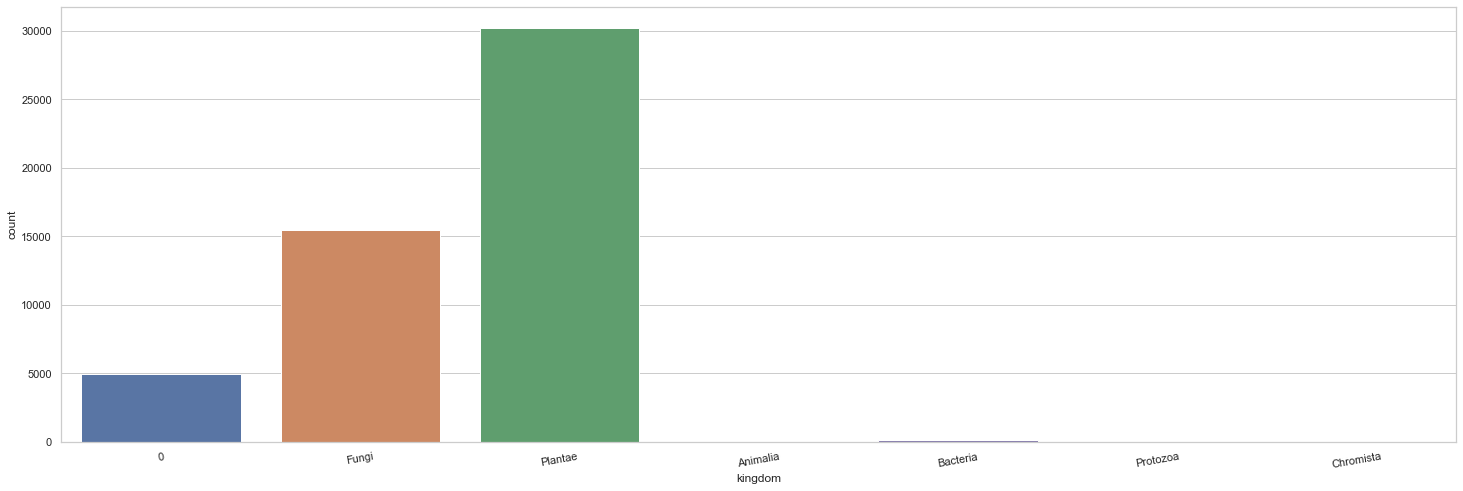

In [35]:
# Kingdom

plt.figure(figsize = (25,8))
ax = sns.countplot(x="kingdom", data=bd_plantas)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
sns.set_theme(style="whitegrid")

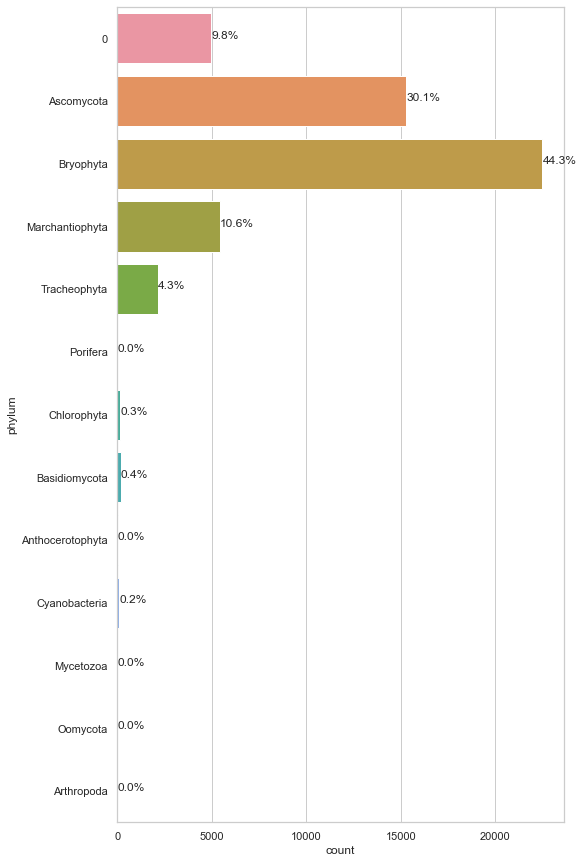

In [45]:
#phylum


plt.figure(figsize = (8,15))
ax = sns.countplot(y="phylum", data=bd_plantas)


total = len(bd_plantas['phylum'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
sns.set_theme(style="whitegrid")

plt.savefig("hist_phylum.png")

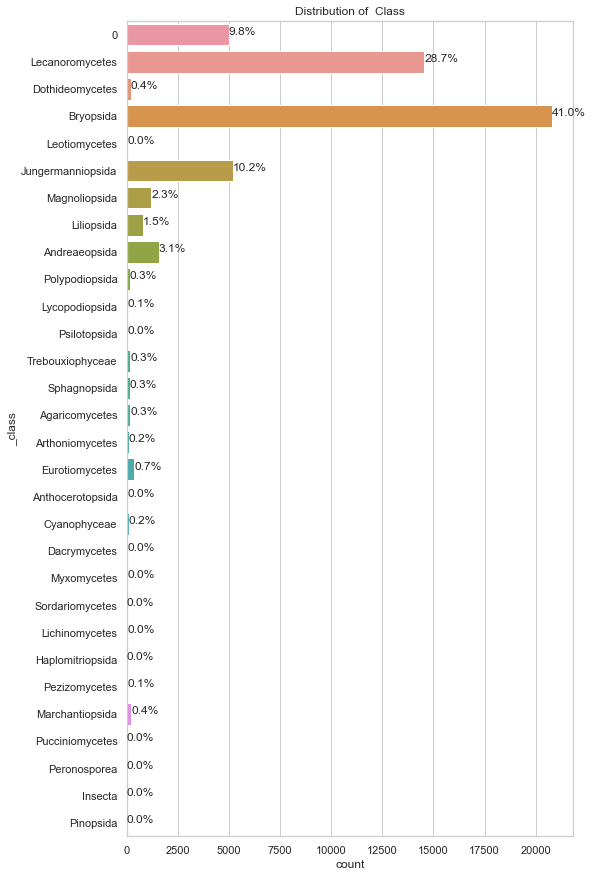

In [48]:
# Class

plt.figure(figsize = (8,15))
plt.title('Distribution of  Class')
ax = sns.countplot(y="_class", data=bd_plantas)


total = len(bd_plantas['_class'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
sns.set_theme(style="whitegrid")
plt.savefig("hist_class.png")